# Simulations for prey-predator models with exogenous mortality source

This notebook aims to be easily executable, by entring the parameters once for all, for the pulsed Schaefer model. If we want to see other conditions, we only need to change the parameters at the top of the notebook.

In [69]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import exo
importlib.reload(exo)

Logistic growth


<module 'exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/exo.py'>

In [70]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 
a = 0.1
#c = 20
m = 0.1
gamma = 0.8
#b = 5
#q = 0.1

E = 0.25
T = 1

t_0 = 0
t_n = 20

tt = 1 #just to not have a missing argument t when we solve models

In [71]:
#Other initial values but the periodic solution
x0_a = 5 
y0_a = 1
x0y0_a = [x0_a, y0_a]

x0_b = 7.5
y0_b = 2
x0y0_b = [x0_b, y0_b]

x0_c = 10
y0_c = 3
x0y0_c = [x0_c, y0_c]

## 1. The most basic Lotka-Volterra model

Periodic solutions (to be calculated)

Solve the ODE with other initial values but the periodic solution

In [72]:
xy_a = exo.solve_basic_lv_model(xy=x0y0_a, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]

xy_b = exo.solve_basic_lv_model(xy=x0y0_b, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_b = xy_b[0]
y_b = xy_b[1]

xy_c = exo.solve_basic_lv_model(xy=x0y0_c, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_c = xy_c[0]
y_c = xy_c[1]

#time points
t = xy_a[2]

In [73]:
print(f'{x_a = }')

x_a = [5, 5.0, 5.020032503047132, 5.0401300189097835, 5.060292557509785, 5.080520123369878, 5.100812724734767, 5.121170360608358, 5.141593027213704, 5.162080719744825, 5.182633425296708, 5.203251131663145, 5.2239338238579265, 5.244681477945147, 5.265494070581634, 5.286371572301288, 5.3073139517140895, 5.328321172542224, 5.3493931938693144, 5.370529972219127, 5.391731458867956, 5.412997600189006, 5.434328338000017, 5.455723610252223, 5.477183352202328, 5.498707493831318, 5.520295960790282, 5.541948674469146, 5.563665550434545, 5.585446499024911, 5.607291426866135, 5.629200236006206, 5.6511728246906365, 5.673209080759184, 5.695308892272401, 5.717472140430885, 5.7396987016866525, 5.761988446701306, 5.784341238064982, 5.806756935246024, 5.829235392565469, 5.851776458864388, 5.8743799774084335, 5.897045785792375, 5.919773715844654, 5.942563593531926, 5.965415238077604, 5.988328460062003, 6.011303065418291, 6.034338853749472, 6.057435618019855, 6.08059314444105, 6.10381121235797, 6.127089594

In [74]:
print(f'{y_a = }')

y_a = [1, 1.0, 1.0030125490695705, 1.006050320001109, 1.0091135386628238, 1.0122024074242824, 1.0153171997931425, 1.0184581499777734, 1.0216254820206347, 1.0248194334951701, 1.0280402478612416, 1.0312881680414694, 1.0345634389514204, 1.0378663119259206, 1.0411970377777893, 1.0445558716784271, 1.0479430702019523, 1.0513588934116065, 1.0548036046381357, 1.0582774686314695, 1.0617807539504678, 1.0653137326567141, 1.0688766800054121, 1.0724698737980876, 1.07609359328149, 1.0797481215726838, 1.08343374477043, 1.0871507518896457, 1.0908994356413033, 1.0946800921353328, 1.098493020123917, 1.10233852143353, 1.1062169005821343, 1.1101284680389742, 1.1140735349786495, 1.1180524167766108, 1.1220654319668575, 1.126112902752554, 1.1301951561236776, 1.1343125214327046, 1.1384653313870818, 1.1426539222124579, 1.1468786336997177, 1.15113980925202, 1.1554377959318314, 1.1597729445079636, 1.1641456098753427, 1.1685561519577305, 1.1730049338145345, 1.1774923224406957, 1.182018688914769, 1.186584408454755

Plot results

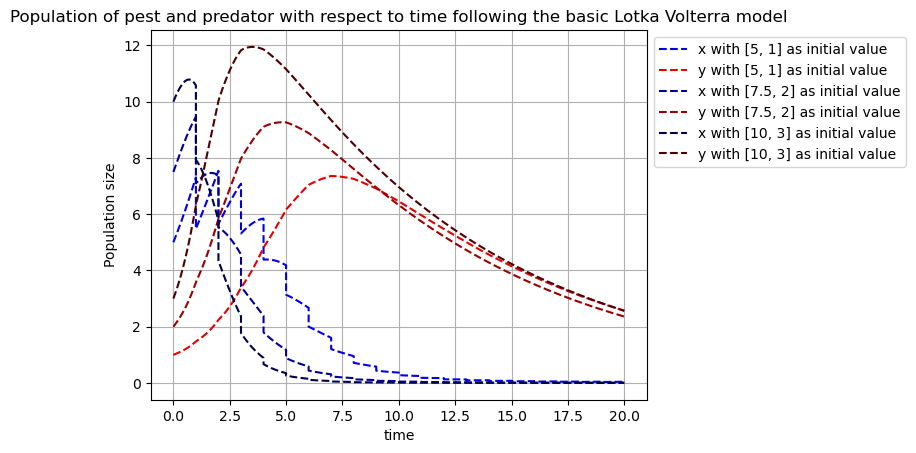

In [75]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the basic Lotka Volterra model')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Some notes about the parameters.  
If $E$ is too small and $x$ is already near $0$, the graphs on the plot seem to be continuous.  
To avoid $x$ to decrease too fast, the search rate $a$ should be small because this model doesn't have an half-saturation constant.

## 2. Lotka-Volterra model with logistic growth

Periodic solutions (to be calculated)

Solve the ODE with other initial values but the periodic solution

In [76]:
xy_a = exo.solve_logistic_lv_model(xy=x0y0_a, t=tt, r=r, K=K, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]

xy_b = exo.solve_logistic_lv_model(xy=x0y0_b, t=tt, r=r, K=K, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_b = xy_b[0]
y_b = xy_b[1]

xy_c = exo.solve_logistic_lv_model(xy=x0y0_c, t=tt, r=r, K=K, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_c = xy_c[0]
y_c = xy_c[1]

#time points
t = xy_a[2]

Plot results

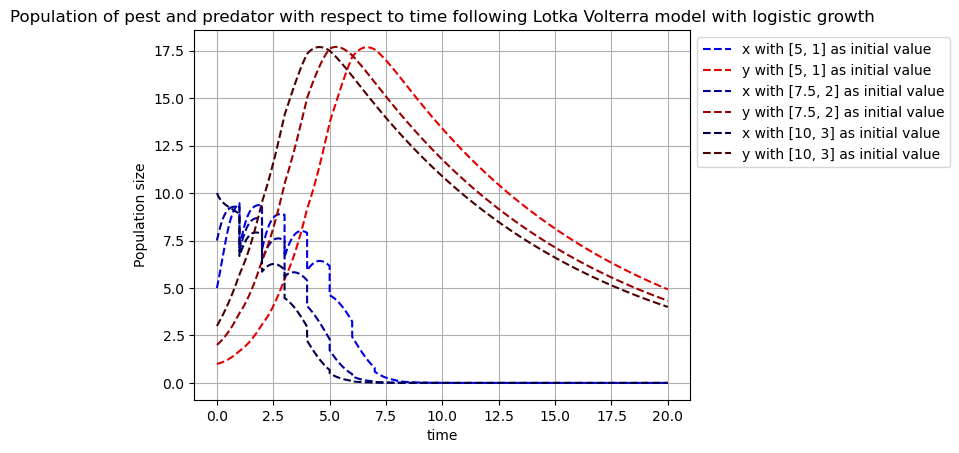

In [77]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 3. Test the general model when we decide the functions

### 3.1 Test the basic Lotka-Volterra model

Solve the ODE with other initial values but the periodic solution

In [78]:
#x and y points for different initial values
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.identity,
        kwargs_g={'z': r},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.identity,
        kwargs_g={'z': r},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.identity,
        kwargs_g={'z': r},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

In [79]:
print(f'{x_a = }')

x_a = [5, 5.0, 5.020032503047132, 5.0401300189097835, 5.060292557509785, 5.080520123369878, 5.100812724734768, 5.1211703606083585, 5.1415930272137045, 5.162080719744826, 5.182633425296709, 5.203251131663146, 5.223933823857927, 5.244681477945149, 5.265494070581636, 5.28637157230129, 5.307313951714091, 5.328321172542226, 5.349393193869316, 5.370529972219128, 5.391731458867957, 5.412997600189008, 5.434328338000018, 5.455723610252225, 5.477183352202329, 5.498707493831319, 5.520295960790284, 5.541948674469146, 5.563665550434545, 5.585446499024911, 5.607291426866136, 5.629200236006206, 5.6511728246906365, 5.673209080759184, 5.695308892272401, 5.717472140430885, 5.7396987016866525, 5.761988446701306, 5.784341238064982, 5.806756935246024, 5.829235392565469, 5.851776458864389, 5.8743799774084335, 5.897045785792375, 5.919773715844655, 5.942563593531926, 5.965415238077603, 5.988328460062003, 6.011303065418291, 6.034338853749472, 6.057435618019854, 6.08059314444105, 6.103811212357969, 6.1270895941

In [80]:
print(f'{y_a = }')

y_a = [1, 1.0, 1.0030125490695705, 1.006050320001109, 1.0091135386628243, 1.0122024074242828, 1.015317199793143, 1.0184581499777738, 1.0216254820206352, 1.0248194334951704, 1.0280402478612418, 1.0312881680414696, 1.0345634389514204, 1.0378663119259208, 1.0411970377777897, 1.0445558716784273, 1.0479430702019528, 1.051358893411607, 1.054803604638136, 1.0582774686314698, 1.0617807539504682, 1.0653137326567146, 1.0688766800054124, 1.072469873798088, 1.0760935932814903, 1.0797481215726843, 1.0834337447704303, 1.087150751889646, 1.0908994356413035, 1.094680092135333, 1.0984930201239174, 1.1023385214335302, 1.1062169005821345, 1.1101284680389745, 1.1140735349786495, 1.1180524167766108, 1.1220654319668575, 1.1261129027525543, 1.1301951561236778, 1.1343125214327048, 1.138465331387082, 1.142653922212458, 1.1468786336997179, 1.1511398092520202, 1.1554377959318318, 1.1597729445079639, 1.1641456098753429, 1.1685561519577308, 1.1730049338145347, 1.177492322440696, 1.1820186889147692, 1.1865844084547

In [81]:
#Test the functions.

x_test = np.arange(7)
y_test = np.arange(7) 
print(f'The growth rate for basic LV model is {r = }')
print(f'The growth rate for general model applied to basic LV model is {exo.identity(x_test, y_test, r) = }')
print(f'The functionnal response for basic LV model is {a*x_test = }')
print(f'The functionnal response for general model applied to basic LV model is {exo.multiply_x(x_test, y_test, a) = }')
print(f'The mortality function for basic LV model is {m = }')
print(f'The mortality function for general model applied to basic LV model is {exo.identity(x_test, y_test, m) = }')

The growth rate for basic LV model is r = 0.5
The growth rate for general model applied to basic LV model is exo.identity(x_test, y_test, r) = 0.5
The functionnal response for basic LV model is a*x_test = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
The functionnal response for general model applied to basic LV model is exo.multiply_x(x_test, y_test, a) = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
The mortality function for basic LV model is m = 0.1
The mortality function for general model applied to basic LV model is exo.identity(x_test, y_test, m) = 0.1


It is always the same, the problem might be on how I coded and/or call the functions.

In [82]:
func_g=exo.identity
kwargs_g={'z': r}
func_f=exo.multiply_x
kwargs_f={'z': a} 
func_m=exo.identity
kwargs_m={'z': m}

print(f'The growth rate for basic LV model is {r = }')
print(f'The growth rate for general model applied to basic LV model is {func_g(x_test, y_test, **kwargs_g) = }')
print(f'The functionnal response for basic LV model is {a*x_test = }')
print(f'The functionnal response for general model applied to basic LV model is {func_f(x_test, y_test, **kwargs_f) = }')
print(f'The mortality function for basic LV model is {m = }')
print(f'The mortality function for general model applied to basic LV model is {func_m(x_test, y_test, **kwargs_m) = }')

The growth rate for basic LV model is r = 0.5
The growth rate for general model applied to basic LV model is func_g(x_test, y_test, **kwargs_g) = 0.5
The functionnal response for basic LV model is a*x_test = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
The functionnal response for general model applied to basic LV model is func_f(x_test, y_test, **kwargs_f) = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
The mortality function for basic LV model is m = 0.1
The mortality function for general model applied to basic LV model is func_m(x_test, y_test, **kwargs_m) = 0.1


Plot results

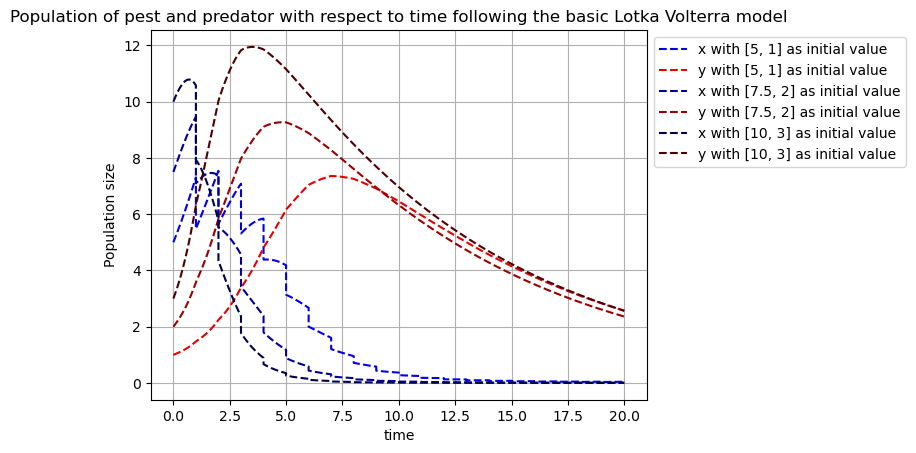

In [83]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the basic Lotka Volterra model')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

It doesn't give the same result as the basic Lotka-Volterra model